In [67]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import pandas as pd
pd.options.mode.chained_assignment = None 

In [68]:
#loading the data
data = pd.read_csv("Clean_data")

In [69]:
#creating a subset of the data
data=data[["MSZoning","LotShape","Neighborhood","SalePrice"]]

In [70]:
#copying data
df=data.copy()

In [71]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(df, # predictors
    df['SalePrice'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)

In [72]:
#checking the data
X_train.head()

,MSZoning,LotShape,Neighborhood,SalePrice
64,RL,Reg,CollgCr,219500
682,RL,Reg,ClearCr,173000
960,RL,IR1,BrkSide,116500
1384,RL,Reg,Edwards,105000
1100,RL,Reg,SWISU,60000


# Raltionship with Target

In [73]:
cat_var = ["MSZoning","LotShape","Neighborhood"]

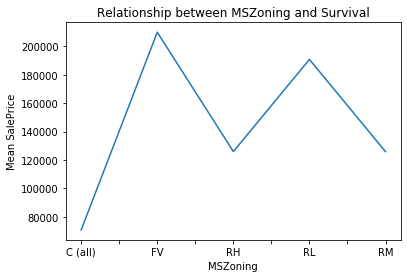

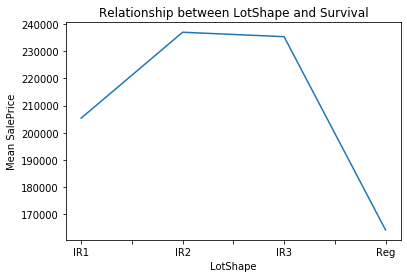

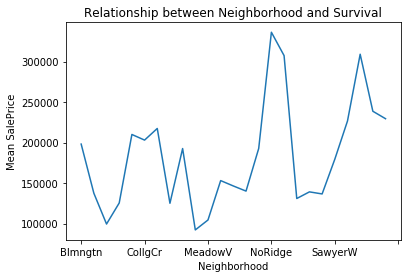

In [74]:
for var in cat_var:
    
    fig = plt.figure()
    fig = X_train.groupby([var])['SalePrice'].mean().plot()
    fig.set_title(f'Relationship between {var} and Survival')
    fig.set_ylabel('Mean SalePrice')
    plt.show()

# Target-Mean-Encoding

In [75]:
#creating a count mapper
mapper = X_train.groupby("MSZoning")["SalePrice"].mean().to_dict()
mapper

{'C (all)': 70808.88888888889,
 'FV': 209995.92105263157,
 'RH': 125995.28571428571,
 'RL': 190841.03663003663,
 'RM': 125910.26760563381}

In [76]:
#creating a count encoding function
def target_mean(train, test, var, target):
    
    """
    Takes 4 input train,test, variable and target. It converts them into target mean encoding
    """
    
    mapper = train.groupby([var])[target].mean().to_dict()
    
    train[var] = train[var].map(mapper)
    test[var] = test[var].map(mapper)

In [77]:
#variable on which we want to apply this
cat_var = ["MSZoning","LotShape","Neighborhood"]

In [78]:
#applying the function
for var in cat_var:
    target_mean(X_train,X_test,var,"SalePrice")
    

In [79]:
#training set after transformation
X_train.head()

,MSZoning,LotShape,Neighborhood,SalePrice
64,190841.03663,164209.091900,203086.371429,219500
682,190841.03663,164209.091900,210034.666667,173000
960,190841.03663,205366.886957,125438.414634,116500
1384,190841.03663,164209.091900,125082.676056,105000
1100,190841.03663,164209.091900,139154.666667,60000


In [80]:
#test set after transformation
X_test.head()

,MSZoning,LotShape,Neighborhood,SalePrice
529,190841.036630,205366.886957,217453.914286,200624
491,190841.036630,164209.091900,146435.264901,133000
459,190841.036630,205366.886957,125438.414634,110000
279,190841.036630,164209.091900,210034.666667,192000
655,125910.267606,164209.091900,99440.000000,88000


# Monotonic Relationship after the transformation

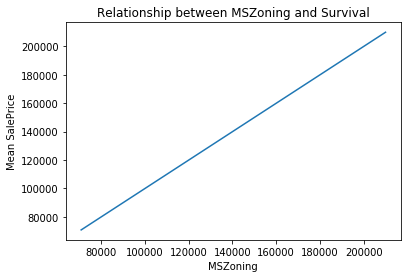

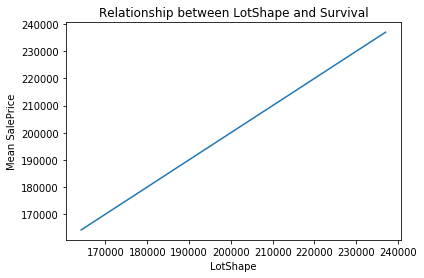

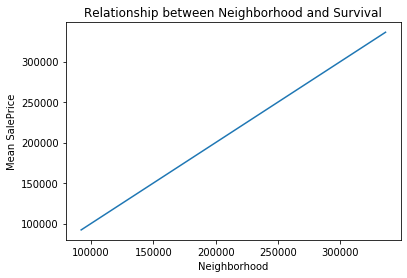

In [81]:
for var in cat_var:
    
    fig = plt.figure()
    fig = X_train.groupby([var])['SalePrice'].mean().plot()
    fig.set_title(f'Relationship between {var} and Survival')
    fig.set_ylabel('Mean SalePrice')
    plt.show()